In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as st
import math
import pandas as pd
import seaborn as sns

from helper_functions import *

In [2]:
def print_sig(model, run):
    for i, col in enumerate(model['coef_names']):
        print(col, model['all_global_betas'][run][i], calc_significance(model, run, col, n_tot = np.sum(model['sizes'])), model['all_standard_errors'][run][i]) 

In [3]:
def weighted_avg(array, sizes):
    return(np.sum([arr * size for arr, size in zip(array, sizes)])/np.sum(sizes))

In [4]:
def det_lowest_mae(model):
    lowest_mae = 100
    best_run = 0
    for i in range(model['nruns']):
        mae = weighted_avg(np.array(model['test_mae'])[i, -1, :], model['sizes'])
        if mae < lowest_mae:
            lowest_mae = mae
            best_run = i
    return best_run, lowest_mae

# MetaboAge results

In [16]:
# reading in MA result files
prefix = "association_analysis_MA/"
models_MA = []

for i in range(1,7):
    with open(prefix + f'M{i}.json', "r") as f:
        model = json.load(f)
    models_MA.append(model)

In [17]:
for i, model in enumerate(models_MA):
    print(f'model M{i}')
    print("covariate \t beta value \t p-value \t standard error")
    best_run, mae = det_lowest_mae(model)
    print_sig(model, best_run)
    print("\n")

model M0
covariate 	 beta value 	 p-value 	 standard error
brain_age 0.1634585337802998 4.2857252977041515e-32 0.013795134924071424


model M1
covariate 	 beta value 	 p-value 	 standard error
brain_age -0.08375999936221826 6.017880995655593e-05 0.021677943009076505
Age 0.32638327308848114 4.472628796365582e-50 0.021677943009076498


model M2
covariate 	 beta value 	 p-value 	 standard error
brain_age -0.011049727856469002 0.3053818169923721 0.021594151124112396
Age 0.3859254348208083 1.8254771208222645e-65 0.022197427587143083
Lag_time 0.13699778573865462 4.33588834969944e-22 0.014143222541753916
sex -0.13978359999077788 6.572382823061735e-14 0.01872711597217576
dm 0.1868184540684937 5.8250013957898327e-08 0.03502094621713367


model M3
covariate 	 beta value 	 p-value 	 standard error
brain_age 0.24783445080271266 2.1842142496815898e-66 0.014157755440795084
Lag_time 0.08347663187646712 2.459874279576688e-09 0.01417901351127394
sex -0.16456122113034677 1.1854885576924209e-17 0.0192602

# MetaboHealth results

In [18]:
# reading in MH result files
prefix = "association_analysis_MH/"
models_MH = []

for i in range(1,7):
    with open(prefix + f'M{i}.json', "r") as f:
        model = json.load(f)
    models_MH.append(model)

In [19]:
for i, model in enumerate(models_MA):
    print(f'model M{i}')
    print("covariate \t beta value \t p-value \t standard error")
    best_run, mae = det_lowest_mae(model)
    print_sig(model, best_run)
    print("\n")

model M0
covariate 	 beta value 	 p-value 	 standard error
brain_age 0.1634585337802998 4.2857252977041515e-32 0.013795134924071424


model M1
covariate 	 beta value 	 p-value 	 standard error
brain_age -0.08375999936221826 6.017880995655593e-05 0.021677943009076505
Age 0.32638327308848114 4.472628796365582e-50 0.021677943009076498


model M2
covariate 	 beta value 	 p-value 	 standard error
brain_age -0.011049727856469002 0.3053818169923721 0.021594151124112396
Age 0.3859254348208083 1.8254771208222645e-65 0.022197427587143083
Lag_time 0.13699778573865462 4.33588834969944e-22 0.014143222541753916
sex -0.13978359999077788 6.572382823061735e-14 0.01872711597217576
dm 0.1868184540684937 5.8250013957898327e-08 0.03502094621713367


model M3
covariate 	 beta value 	 p-value 	 standard error
brain_age 0.24783445080271266 2.1842142496815898e-66 0.014157755440795084
Lag_time 0.08347663187646712 2.459874279576688e-09 0.01417901351127394
sex -0.16456122113034677 1.1854885576924209e-17 0.0192602

# Comparison (MA) with HASE

In [21]:
# reading in hase result files
prefix = "hase_results/"
models_hase = []

for i in range(1,7):
    with open(prefix + f'M{i}.json', "r") as f:
        model = json.load(f)
    models_hase.append(model)

federated mae for model M1: 0.7687457006446783
HASE mae for model M1: 0.7688030281821394
federated mae for model M1.5: 0.745613395218582
HASE mae for model M1.5: 0.7454323047777583
federated mae for model M2: 0.7421909291163257
HASE mae for model M2: 0.7347291138583968
federated mae for model M2.5: 0.7646732855291942
HASE mae for model M2.5: 0.7595902376962023
federated mae for model M3: 0.7396435232633407
HASE mae for model M3: 0.7341581466805639
federated mae for model M3.5: 0.7597444424447249
HASE mae for model M3.5: 0.7571230798159573


Text(0.5, 1.0, 'comparison between federated beta values and HASE (meta analysis) beta values')

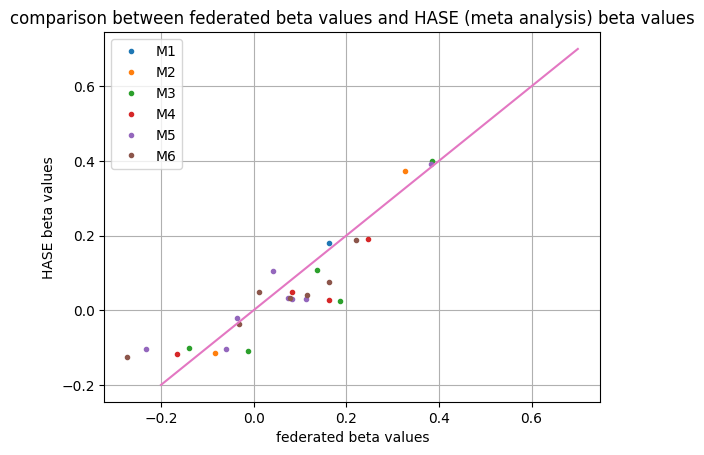

In [23]:
# make plot
for i, (model, hase_model) in enumerate(zip(models_MA, models_hase)):
    inds, mae = det_lowest_mae(model)
    model_betas = model['all_global_betas'][inds]
    plt.plot(model_betas, hase_model['global_betas'], ".", label = f'M{i + 1}')
    print(f'federated mae for model {model["model"]}: {mae}')
    print(f'HASE mae for model {model["model"]}: {weighted_avg(hase_model["mae"], hase_model["sizes"])}')

plt.plot(np.arange(-0.2, 0.8, 0.1), np.arange(-0.2, 0.8, 0.1))
plt.xlabel("federated beta values")
plt.ylabel("HASE beta values")
plt.grid(True)
plt.legend()
plt.title("comparison between federated beta values and HASE (meta analysis) beta values")

Text(0.5, 1.0, 'comparison between federated beta values and HASE (meta analysis) beta values')

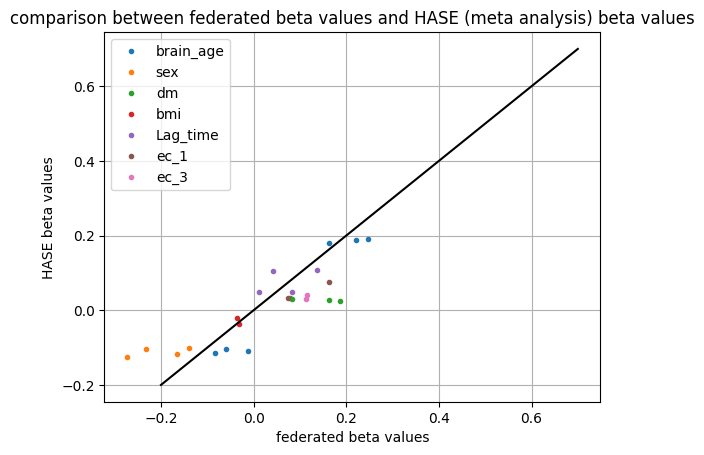

In [22]:
# same plot, but colored by covariate 
all_covs = models_MA[-1]['coef_names']
# models = [M1, M15, M2, M25, M3, M35]
# hase_models = [M1_hase, M15_hase, M2_hase, M25_hase, M3_hase, M35_hase]

for cov in all_covs:
    cov_list = []
    hase_cov_list = []
    for model, hase_model in zip(models_MA, models_hase):
        if 'metabo_age' in hase_model['coef_names']:
            hase_model['coef_names'].remove('metabo_age')
        inds, mae = det_lowest_mae(model)
        model_betas = model['all_global_betas'][inds]
        if cov in model['coef_names']:
            model_idx = np.where(np.array(model['coef_names']) == cov)[0]
            cov_list.append(np.array(model_betas)[model_idx])
            hase_cov_list.append(np.array(hase_model['global_betas'])[model_idx])
    
    plt.plot(cov_list, hase_cov_list, ".", label = cov)
    
plt.plot(np.arange(-0.2, 0.8, 0.1), np.arange(-0.2, 0.8, 0.1), color ='black')
plt.xlabel("federated beta values")
plt.ylabel("HASE beta values")
plt.grid(True)
plt.legend()
plt.title("comparison between federated beta values and HASE (meta analysis) beta values")         